In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
from scipy import fftpack
from sklearn.preprocessing import StandardScaler

In [19]:
dfp = pd.read_csv('data/city_hour.csv')
dfp.Datetime = pd.to_datetime(dfp.Datetime,format = '%d-%m-%Y %H:%M')
dfp.head()

City            Datetime  PM2.5  PM10    NO    NO2    NOx  NH3    CO  \
0  Ahmedabad 2015-01-01 01:00:00    NaN   NaN  1.00  40.01  36.37  NaN  1.00   
1  Ahmedabad 2015-01-01 02:00:00    NaN   NaN  0.02  27.75  19.73  NaN  0.02   
2  Ahmedabad 2015-01-01 03:00:00    NaN   NaN  0.08  19.32  11.08  NaN  0.08   
3  Ahmedabad 2015-01-01 04:00:00    NaN   NaN  0.30  16.45   9.20  NaN  0.30   
4  Ahmedabad 2015-01-01 05:00:00    NaN   NaN  0.12  14.90   7.85  NaN  0.12   

      SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  122.07     NaN      0.0      0.0     0.0  NaN        NaN  
1   85.90     NaN      0.0      0.0     0.0  NaN        NaN  
2   52.83     NaN      0.0      0.0     0.0  NaN        NaN  
3   39.53  153.58      0.0      0.0     0.0  NaN        NaN  
4   32.63     NaN      0.0      0.0     0.0  NaN        NaN

In [20]:
dft = pd.read_csv('data/temp_hour.csv')
#del dft['Unnamed: 0']
dft.Datetime = pd.to_datetime(dft.Datetime, format = '%d-%m-%Y %H:%M')
dft.head(5)

City            Datetime  maxtempC  mintempC  sunHour  DewPointC  \
0  Bengaluru 2009-01-01 00:00:00        27        12     11.6         16   
1  Bengaluru 2009-01-01 01:00:00        27        12     11.6         16   
2  Bengaluru 2009-01-01 02:00:00        27        12     11.6         15   
3  Bengaluru 2009-01-01 03:00:00        27        12     11.6         15   
4  Bengaluru 2009-01-01 04:00:00        27        12     11.6         15   

   FeelsLikeC  HeatIndexC  WindChillC  WindGustKmph  cloudcover  humidity  \
0          18          18          18            11           2        91   
1          17          17          17             9           2        93   
2          16          16          16             7           2        94   
3          15          15          15             5           2        96   
4          18          18          18             5           1        88   

   precipMM  pressure  tempC  visibility  winddirDegree  windspeedKmph  
0       0.0      1014     14          10            109              8  
1       0.0      1014     14           7             85              6  
2       0.0      1014     13           5             61              4  
3       0.0      1014     12           2             37              3  
4       0.0      1015     14           5             45              3

In [21]:
df = dfp.merge(dft,on=['City','Datetime'])
df.head()

City            Datetime  PM2.5  PM10    NO    NO2   NOx    NH3    CO  \
0  Bengaluru 2015-01-01 01:00:00    NaN   NaN  2.04  12.40  7.58  19.10  0.19   
1  Bengaluru 2015-01-01 02:00:00    NaN   NaN  2.20  12.11  7.54  17.81  0.21   
2  Bengaluru 2015-01-01 03:00:00    NaN   NaN  1.66  10.82  6.52  17.42  0.30   
3  Bengaluru 2015-01-01 04:00:00    NaN   NaN  1.92  10.32  6.46  16.86  0.13   
4  Bengaluru 2015-01-01 05:00:00    NaN   NaN  1.94   9.82  6.22  16.35  0.15   

    SO2  ...  WindChillC  WindGustKmph  cloudcover  humidity  precipMM  \
0  4.05  ...          20            14          65        91       0.0   
1  4.23  ...          19            12          74        94       0.0   
2  4.28  ...          19            10          83        97       0.0   
3  4.14  ...          19             9          75        93       0.0   
4  4.26  ...          20             9          66        90       0.0   

  pressure  tempC  visibility  winddirDegree  windspeedKmph  
0     1010     19           7            141              9  
1     1010     19           5            149              8  
2     1010     18           2            156              6  
3     1011     19           5            156              7  
4     1011     20           7            155              7  

[5 rows x 32 columns]

In [30]:
num_cols = df.columns[df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df

City            Datetime     PM2.5      PM10        NO       NO2  \
0       Bengaluru 2015-01-01 01:00:00       NaN       NaN -0.530639 -0.919834   
1       Bengaluru 2015-01-01 02:00:00       NaN       NaN -0.525940 -0.931424   
2       Bengaluru 2015-01-01 03:00:00       NaN       NaN -0.541800 -0.982980   
3       Bengaluru 2015-01-01 04:00:00       NaN       NaN -0.534164 -1.002963   
4       Bengaluru 2015-01-01 05:00:00       NaN       NaN -0.533577 -1.022946   
...           ...                 ...       ...       ...       ...       ...   
197658     Mumbai 2020-01-01 19:00:00  0.295523  0.153576 -0.362933  0.441813   
197659     Mumbai 2020-01-01 20:00:00  0.280170  0.133073 -0.254848  0.611270   
197660     Mumbai 2020-01-01 21:00:00  0.420246  0.293031 -0.130904  0.990948   
197661     Mumbai 2020-01-01 22:00:00  0.568338  0.463594  0.066761  1.388611   
197662     Mumbai 2020-01-01 23:00:00  0.704610  0.584755  0.047377  0.861458   

             NOx       NH3        CO       SO2  ...  WindChillC  WindGustKmph  \
0      -0.734983 -0.421752 -0.386924 -0.620227  ...   -1.329949     -0.270614   
1      -0.735940 -0.486334 -0.378650 -0.603609  ...   -1.497155     -0.487893   
2      -0.760335 -0.505859 -0.341415 -0.598994  ...   -1.497155     -0.705171   
3      -0.761770 -0.533894 -0.411747 -0.611918  ...   -1.497155     -0.813810   
4      -0.767511 -0.559427 -0.403473 -0.600840  ...   -1.329949     -0.813810   
...          ...       ...       ...       ...  ...         ...           ...   
197658  0.380282 -0.543907 -0.068362 -0.294346  ...   -0.493917     -0.053336   
197659  0.569946 -0.515871 -0.022853 -0.329427  ...   -0.493917     -0.161975   
197660  0.898092 -0.508863  0.039204 -0.345121  ...   -0.493917     -0.270614   
197661  1.297511 -0.527386  0.092988 -0.351583  ...   -0.493917     -0.379253   
197662  0.965538 -0.519876  0.072302 -0.326658  ...   -0.661123     -0.487893   

        cloudcover  humidity  precipMM  pressure     tempC  visibility  \
0         1.486621  1.700199 -0.201704  0.151214 -1.302494   -2.067956   
1         1.818168  1.833228 -0.201704  0.151214 -1.302494   -3.519809   
2         2.149715  1.966258 -0.201704  0.151214 -1.468069   -5.697589   
3         1.855007  1.788885 -0.201704  0.330768 -1.302494   -3.519809   
4         1.523460  1.655856 -0.201704  0.330768 -1.136919   -2.067956   
...            ...       ...       ...       ...       ...         ...   
197658   -0.760530  0.502934 -0.201704  0.869430 -0.309043    0.109824   
197659   -0.760530  0.547277 -0.201704  1.048984 -0.309043    0.109824   
197660   -0.760530  0.635963 -0.201704  1.048984 -0.309043    0.109824   
197661   -0.760530  0.591620 -0.201704  1.048984 -0.309043    0.109824   
197662   -0.760530  0.591620 -0.201704  1.048984 -0.474618    0.109824   

        winddirDegree  windspeedKmph  
0           -0.557497      -0.477440  
1           -0.475006      -0.635040  
2           -0.402826      -0.950242  
3           -0.402826      -0.792641  
4           -0.413137      -0.792641  
...               ...            ...  
197658       1.329491       0.310563  
197659       1.391359       0.152963  
197660       1.442916       0.152963  
197661       1.092328      -0.004638  
197662       0.741741      -0.319839  

[197663 rows x 32 columns]

In [31]:
df.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'maxtempC', 'mintempC', 'sunHour', 'DewPointC', 'FeelsLikeC',
       'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
       'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree',
       'windspeedKmph'],
      dtype='object')

In [32]:
city = ['Bengaluru', 'Delhi', 'Hyderabad', 'Jaipur', 'Mumbai']

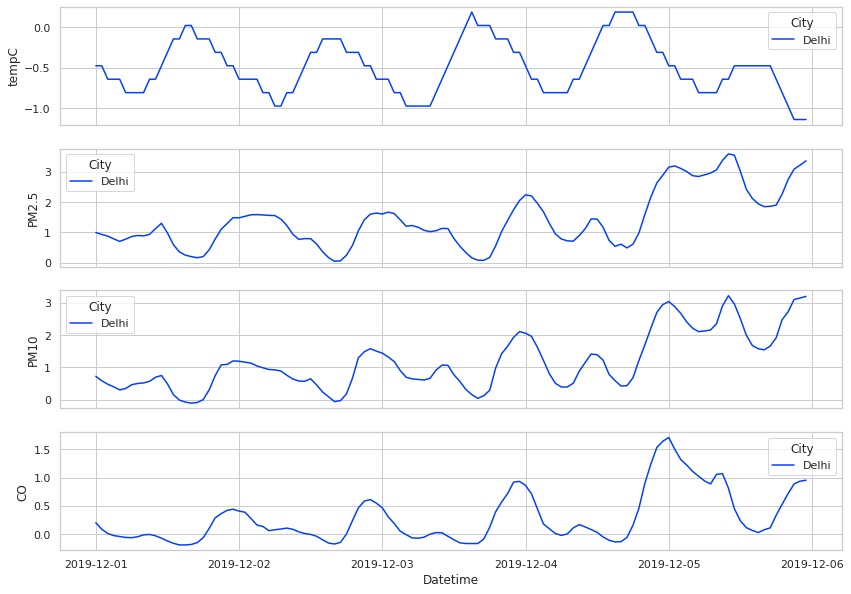

In [33]:
dc = df[(df.City == 'Delhi')]
dff = dc[(dc['Datetime'].dt.year == 2019) 
         & (dc['Datetime'].dt.month == 12) 
         & (dc['Datetime'].dt.day <=5)
        ]
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (14,10),sharex=True,)
sns.lineplot(dff['Datetime'],dff['tempC'],hue = dff['City'],ax=ax1)
sns.lineplot(dff['Datetime'],dff['PM2.5'],hue = dff['City'],ax=ax2)
sns.lineplot(dff['Datetime'],dff['PM10'],hue = dff['City'],ax=ax3)
sns.lineplot(dff['Datetime'],dff['CO'],hue = dff['City'],ax=ax4)
#sns.lineplot(dff['Datetime'],dff['windspeedKmph'],hue = dff['City'],ax=ax5)
fig.savefig(f'images/fftlineplot.png', bbox_inches='tight')
plt.show()

In [34]:
s1 = np.asarray(dff['tempC'])
s2 = np.asarray(dff['PM10'])

19.00333240936334


(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

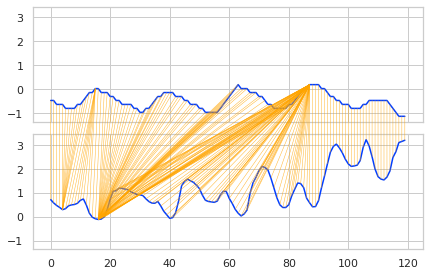

In [35]:
path = dtw.warping_path(s1, s2)
distance = dtw.distance(s1, s2)
print(distance)
dtwvis.plot_warping(s1, s2, path, 
                    #filename="warp.png"
                   )

20.518005653316244


(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

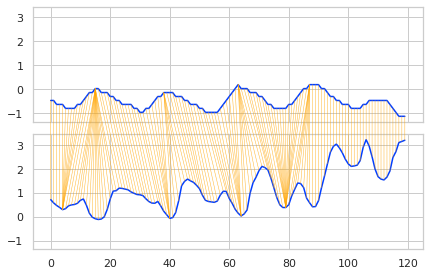

In [49]:
path = dtw.warping_path(s1, s2,window=8)
distance = dtw.distance(s1, s2,window=8)
print(distance)
dtwvis.plot_warping(s1, s2, path, 
                   )

21.28950202213777


(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

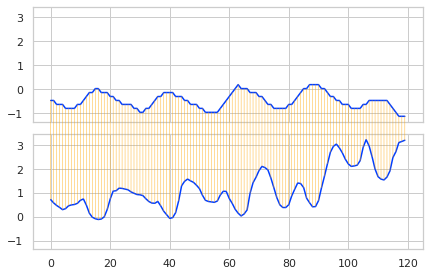

In [46]:
path = dtw.warping_path(s1, s2,window=1)
distance = dtw.distance(s1, s2,window=1)
print(distance)
dtwvis.plot_warping(s1, s2, path, 
                   )

62.416332623673334
47.90348389410726
50.94411114192754
31.040181380014324
38.164303886354716
32.57762985572786
32.352833537049605
19.1108055813062
19.44023118676231
14.866571364952557
12.563710890139252
8.299377943788723
11.045245841883265
14.639242669720973
21.725282669175968
13.254722471464147
24.814526562101474
23.69516529067548
18.41881738351956
17.903109059807697
25.69367809438813
34.95494239693546
38.26886168933265
32.813999023462564
27.343002482762795
32.19004311008187
31.567151058792753
22.711022803603925
20.322390859557146
19.73473120522773
22.32905276306253
22.93621350609841
20.870699678000204
20.07566270718076
22.029297310986482
20.172334038397285
19.99705436110949
22.85955090152971
12.300868979959647
13.279920276621867
9.030936146469479
5.319130146850523
10.71382825954903
48.231089877864285
22.870192303107693
46.690752731543604
20.759303523257927
11.677103925309373
32.7744298783532
37.43519676195932
41.439137367659185


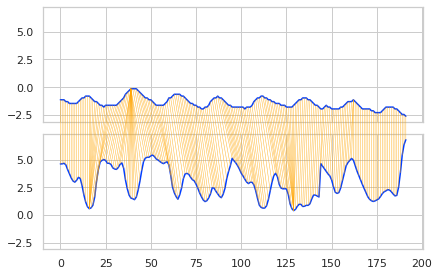

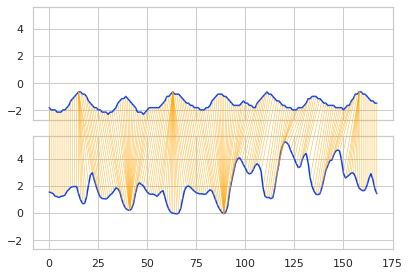

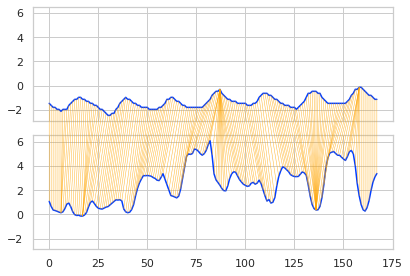

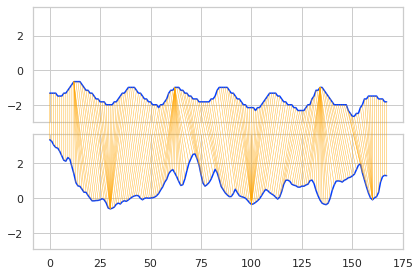

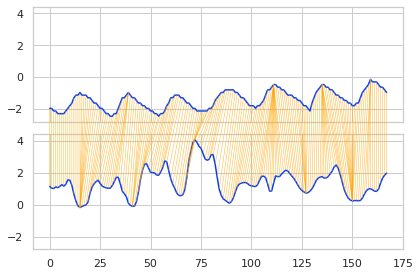

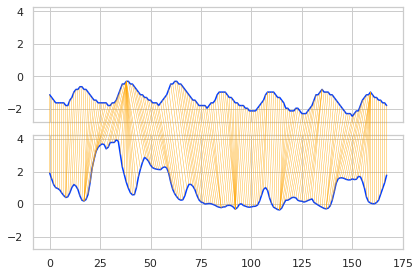

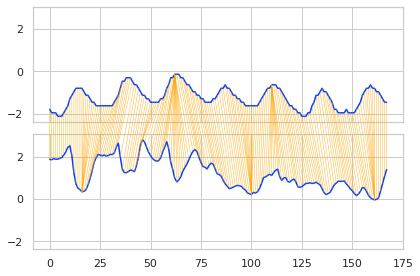

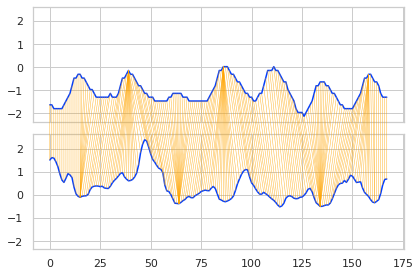

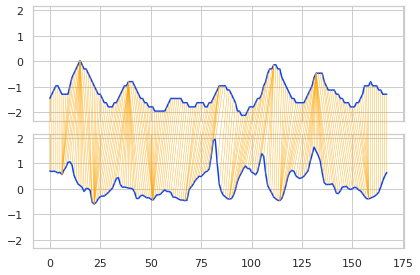

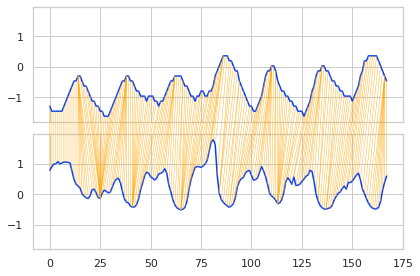

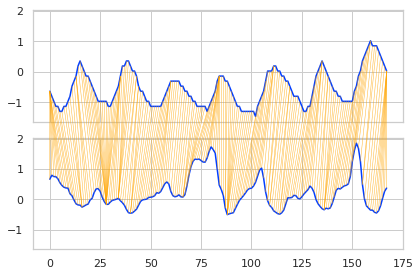

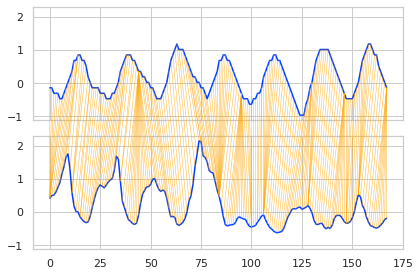

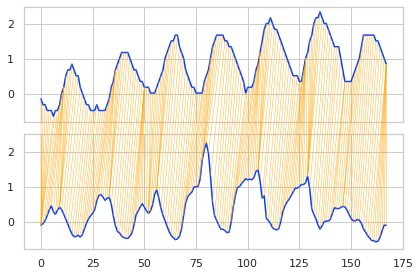

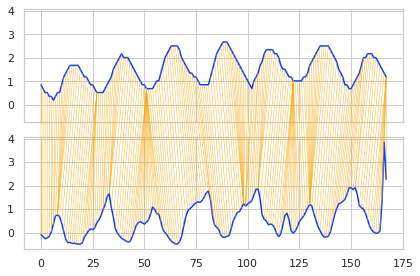

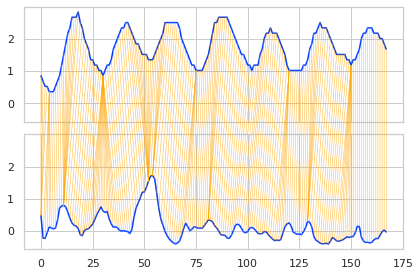

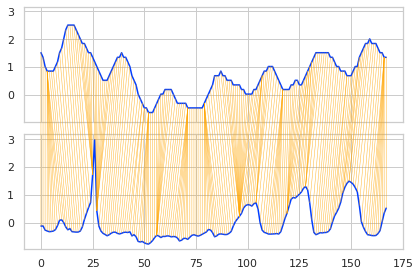

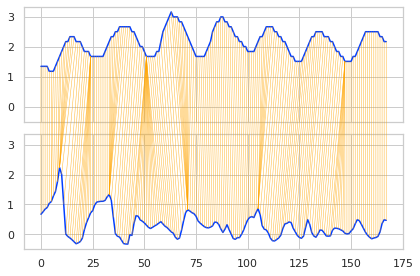

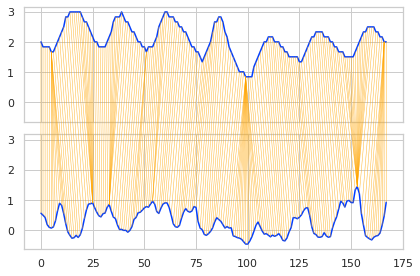

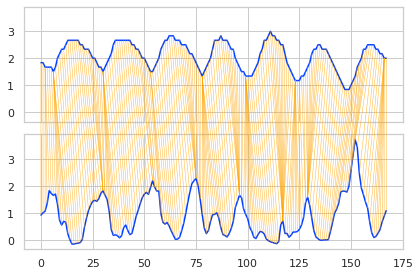

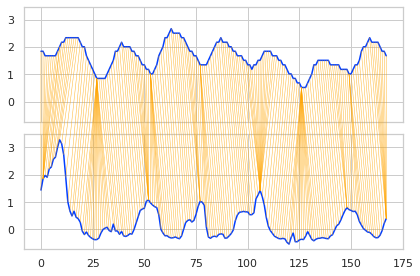

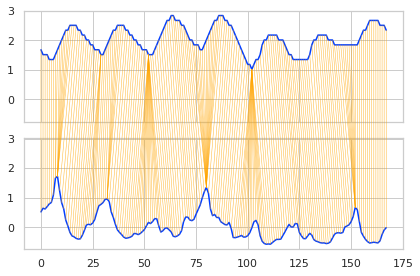

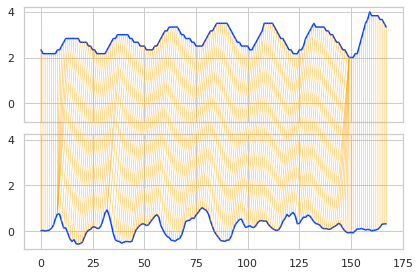

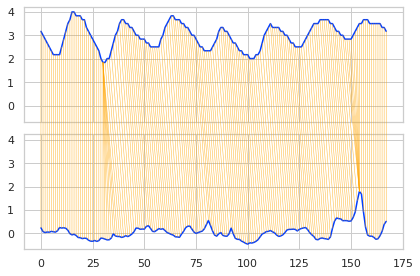

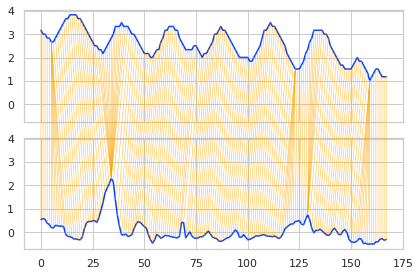

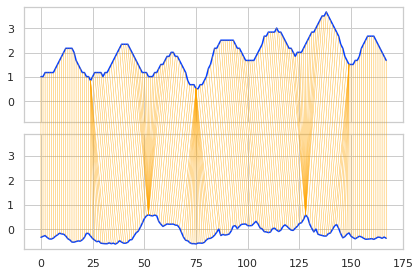

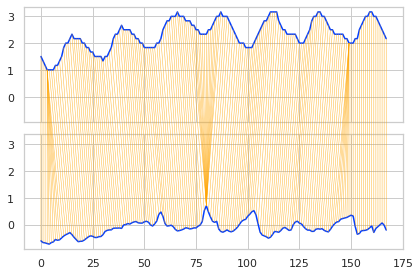

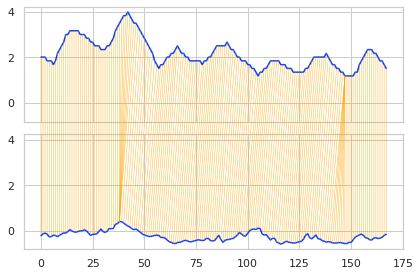

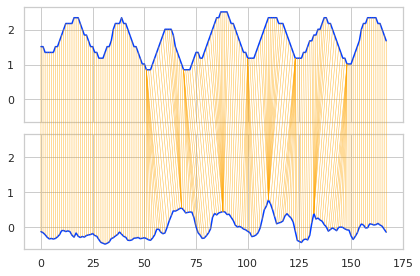

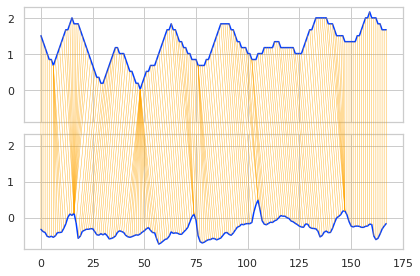

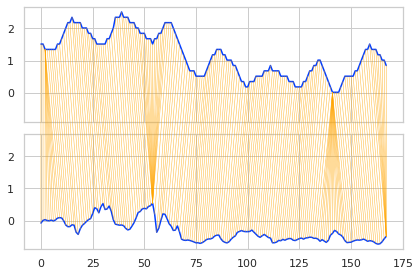

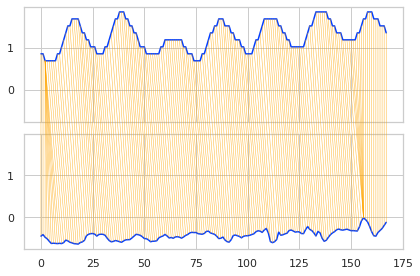

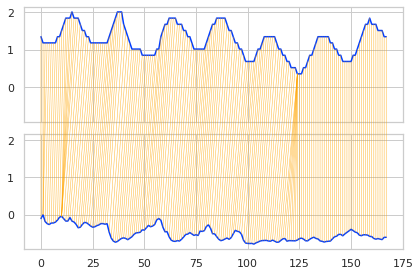

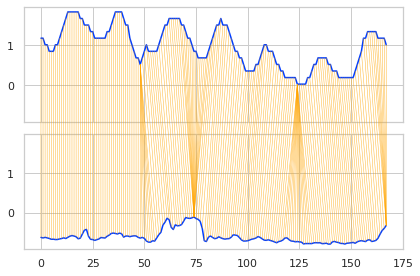

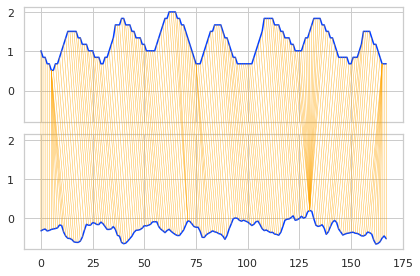

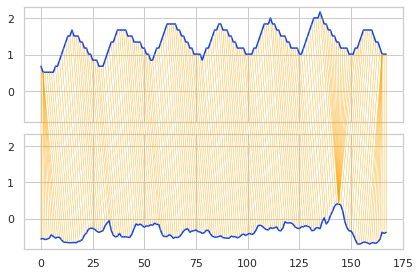

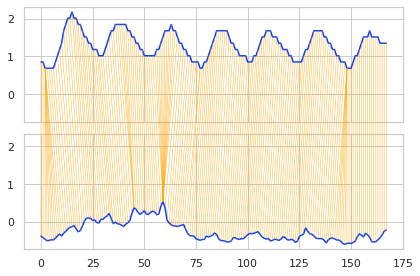

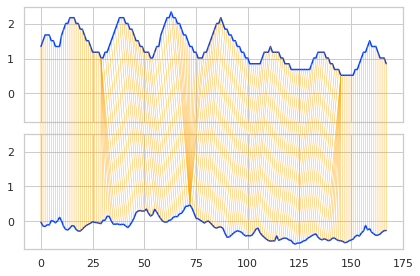

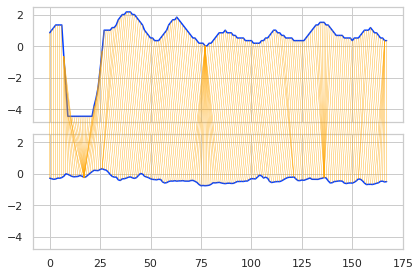

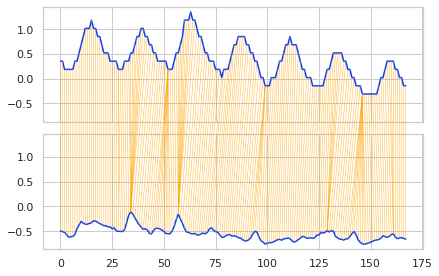

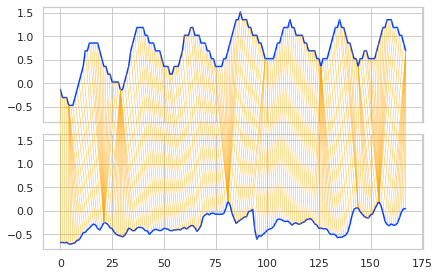

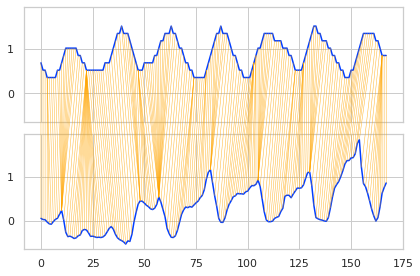

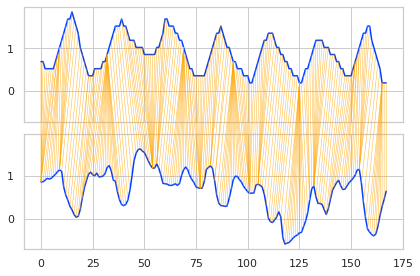

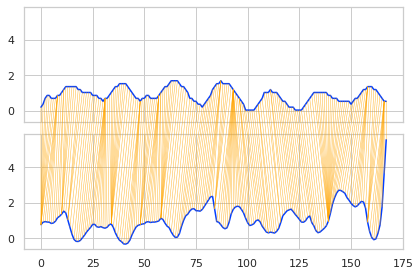

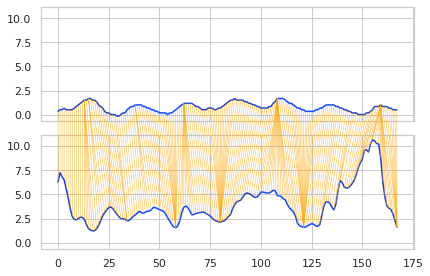

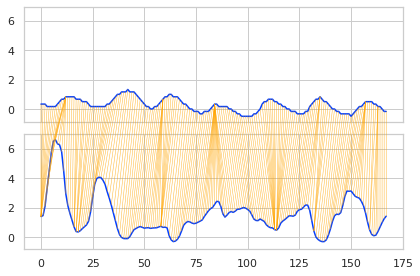

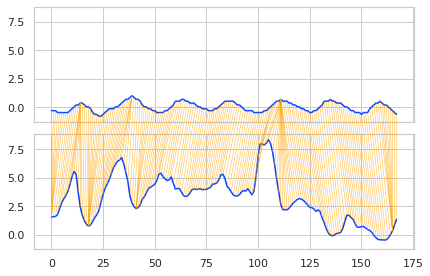

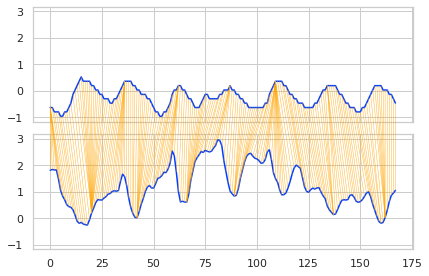

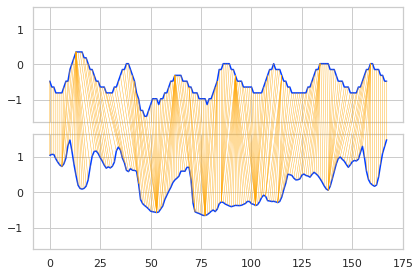

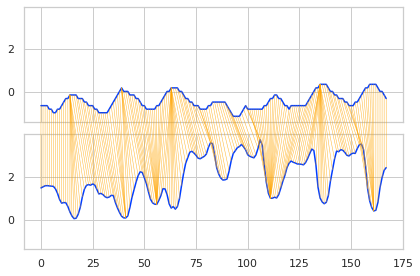

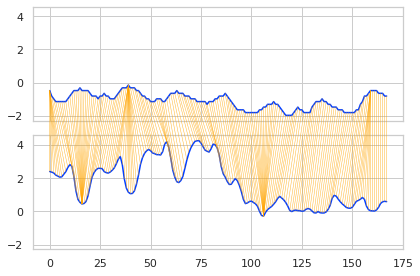

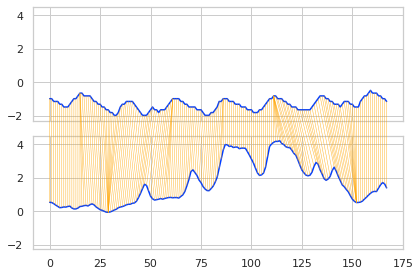

In [53]:
dfh = df[df.City == 'Delhi']
for i in range(1,52):
    dfw = dfh[(dfh.Datetime.dt.week == i) & (dfh.Datetime.dt.year == 2019)]
    path = dtw.warping_path(np.asarray(dfw['tempC']), np.asarray(dfw['PM2.5']),window=8)
    distance = dtw.distance(np.asarray(dfw['tempC']), np.asarray(dfw['PM2.5']),window=8)
    print(distance)
    dtwvis.plot_warping(np.asarray(dfw['tempC']), np.asarray(dfw['PM2.5']),path, 
                   )